### Лабораторная работа №5
#### Ногорбеков Салим
### WIN-1-21
## Изучение моделей классификации и регрессии

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.datasets import load_diabetes
from sklearn.datasets import load_linnerud


### 1.Diabet Dataset

In [2]:
diabetes_dataset = load_diabetes()

### Description

In [15]:
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Dataset size

In [41]:
print(diabetes_dataset['data'].shape)

(442, 10)


### Features

In [16]:
print(diabetes_dataset['feature_names'])

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### First 10 lines of the dataset

In [17]:
print(diabetes_dataset['data'][:10])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]
 [-0.09269548 -0.04464164 -0.04069594 -0.01944183 -0.06899065 -0.07928784
   0.04127682 -0.0763945  -0.04117617 -0.09634616]
 [-0.04547248  0.05068012 -0.04716281 -0.01599898 -0.04009564 -0.02480001
   0.00077881 -0.03949338 -0.06291688 -0.03835666]
 [ 0.06350368  0.05068012 -0.00189471  0.06662945  0.09061988  0.10891438
   0.02286863  0.01770335 -0.03581619  0.00306441]


### The assessment of disease progression for each patient at one year is compared with baseline.

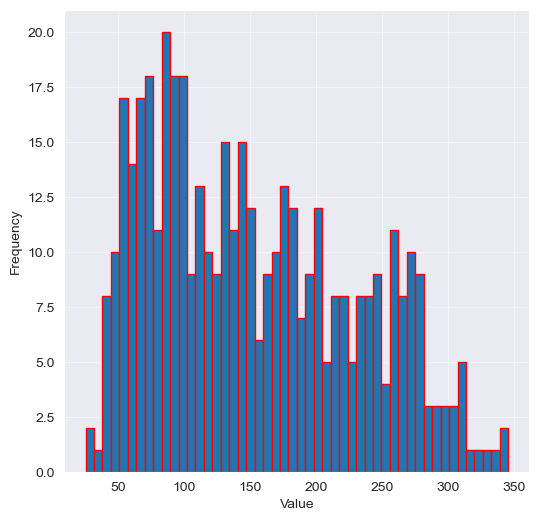

In [42]:
plt.figure(figsize=(6, 6))

plt.hist(diabetes_dataset['target'], bins=50, edgecolor='r')

plt.xlabel('Value')
plt.ylabel('Frequency')

plt.grid(True, alpha=0.5)

plt.show()

### Distribution of dataset features

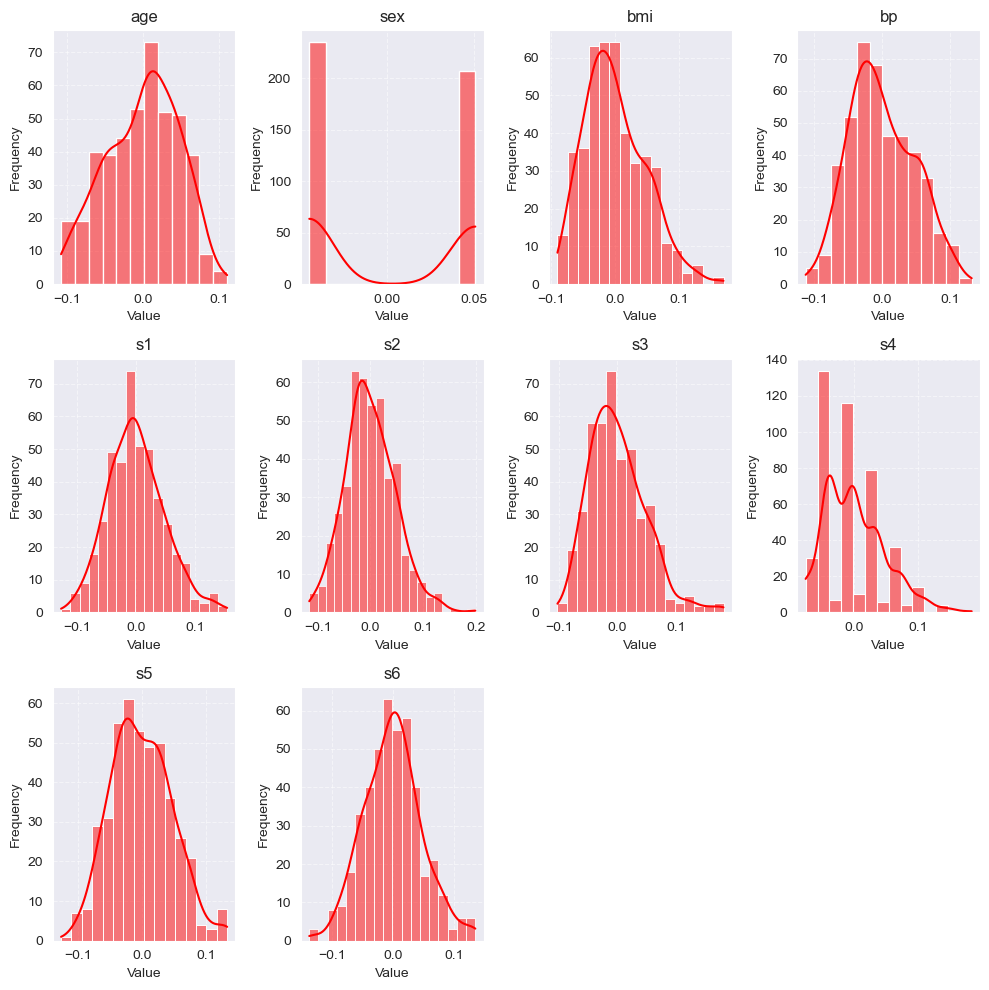

In [44]:
diabetes_df = pd.DataFrame(diabetes_dataset['data'], columns=diabetes_dataset['feature_names'])

plt.figure(figsize=(10, 10))

for i, feature in enumerate(diabetes_dataset['feature_names']):
    plt.subplot(3, 4, i + 1)
    sns.histplot(diabetes_df[feature], color='red', kde=True)
    plt.title(feature)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


### Splitting the dataset into training and test sets

In [82]:
X_training, X_testing, y_training, y_testing = train_test_split(diabetes_dataset['data'], diabetes_dataset['target'], random_state=15)

### k-nearest neighbors regression algorithm

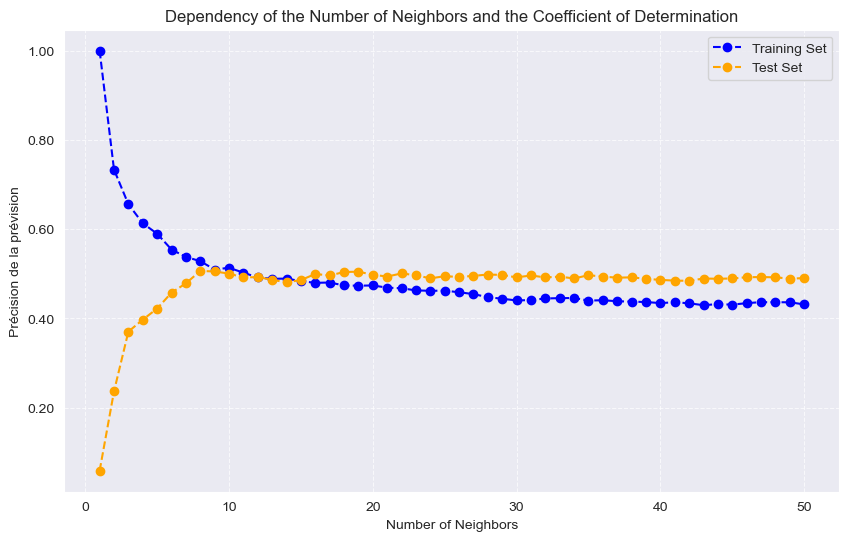

In [83]:
n_neighbors_values = list(range(1, 51))
scores_training = []
scores_testing = []

for neb_value in n_neighbors_values:
    model = KNeighborsRegressor(n_neighbors=neb_value)
    model.fit(X_training, y_training)
    score_training = model.score(X_training, y_training)
    score_testing = model.score(X_testing, y_testing)
    scores_training.append(score_training)
    scores_testing.append(score_testing)

plt.figure(figsize=(10, 6))

plt.plot(n_neighbors_values, scores_training, label='Training Set', marker='o', linestyle='--', color='blue')
plt.plot(n_neighbors_values, scores_testing, label='Test Set', marker='o', linestyle='--', color='orange')

plt.title('Dependency of the Number of Neighbors and the Coefficient of Determination')
plt.xlabel('Number of Neighbors')
plt.ylabel('Précision de la prévision')

plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().yaxis.set_major_formatter('{:.2f}'.format)
plt.legend(loc='best')

plt.show()

<p>
Из графика видно, что чем меньше соседей учитывается, тем выше коэффициент детерминации. Это может свидетельствовать о переобучении модели при малом числе соседей. Начиная с определенного количества соседей, коэффициент детерминации начинает расти. Это указывает на то, что с увеличением числа соседей модель становится более обобщающей и лучше обобщает данные на новых примерах. Оптимальное количество соседей,(где линии обучения и тестирования пересекаются) при котором достигается наилучший коэффициент детерминации лежит в диапазоне 10-15.
</p>

### Linear Regression

In [59]:
model = LinearRegression()
model.fit(X_training, y_training)

weights = model.coef_
intercept = model.intercept_
r_squared_training = model.score(X_training, y_training)
r_squared_testing = model.score(X_testing, y_testing)

print('Linear Regression Model:')
print('Coefficients (Weights):')
for feature, weight in zip(diabetes_dataset['feature_names'], weights):
    print(f'{feature}: {weight:.4f}')

print('\nIntercept (Bias):', intercept)

print('\nCoefficient of Determination (R^2) for the Training Set: {:.4f}'.format(r_squared_training))
print('Coefficient of Determination (R^2) for the Test Set: {:.4f}'.format(r_squared_testing))

Linear Regression Model:
Coefficients (Weights):
age: -15.2416
sex: -223.9073
bmi: 537.8628
bp: 306.0099
s1: -1215.0250
s2: 655.6178
s3: 386.1839
s4: 376.0566
s5: 926.7270
s6: 91.2125

Intercept (Bias): 150.83081708951661

Coefficient of Determination (R^2) for the Training Set: 0.5249
Coefficient of Determination (R^2) for the Test Set: 0.4632


<p>
Исходя из результатов обучения линейной регрессионной модели можно сделать выводы, что признаки bmi и s5 имеют положительные веса, что может свидетельствовать о том, что увеличение этих признаков положительно влияет на целевую переменную, в то время как признаки sex и s1 имеют отрицательные веса, указывая на обратную зависимость. Значение R^2 на обучающем наборе составляет примерно 0.5249, что означает, что модель объясняет 52.49% изменчивости в данных. Значение R^2 на тестовом наборе составляет примерно 0.4632, что указывает на то, что модель также хорошо справляется с новыми данными, но есть возможность улучшения ее обобщающей способности.</p>

### Ridge regression

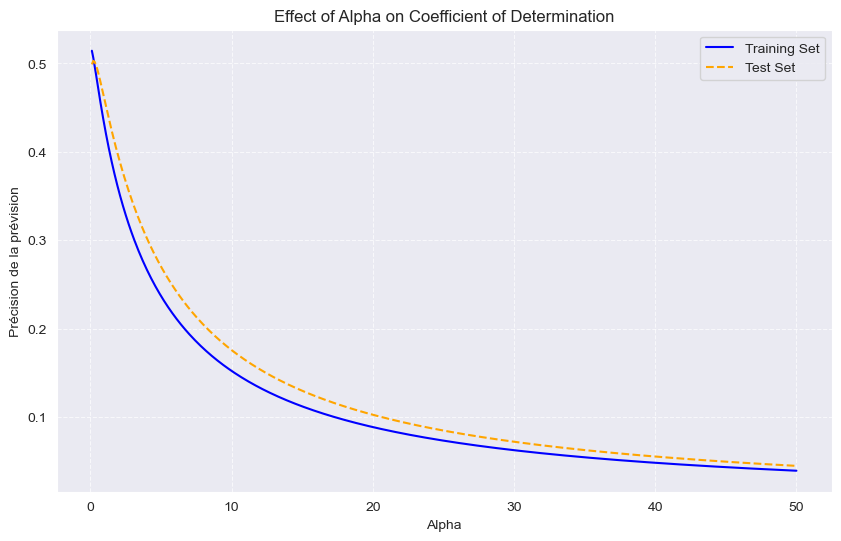

In [85]:
alpha_values = np.arange(0.1, 50.1, 0.1)
scores_training = []
scores_testing = []

for alpha_value in alpha_values:
    model = Ridge(alpha=alpha_value)
    model.fit(X_training, y_training)

    scores_training.append(model.score(X_training, y_training))

for alpha_value in alpha_values:
    model = Ridge(alpha=alpha_value)
    model.fit(X_training, y_training)

    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(10, 6))

plt.plot(alpha_values, scores_training, label='Training Set', linestyle='-', color='blue')
plt.plot(alpha_values, scores_testing, label='Test Set', linestyle='--', color='orange')

plt.title('Effect of Alpha on Coefficient of Determination')
plt.xlabel('Alpha')
plt.ylabel('Précision de la prévision')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best')

plt.show()


<p>
Из графика зависимости коэффициента детерминации можно сделать следующие выводы, что начальное значение alpha близкое к 0. С увеличением alpha производительность сначала снижается, а затем стабилизируется на некотором уровне. Это означает, что при более сильной регуляризации модель становится менее склонной к переобучению.
</p>

### Lasso regression

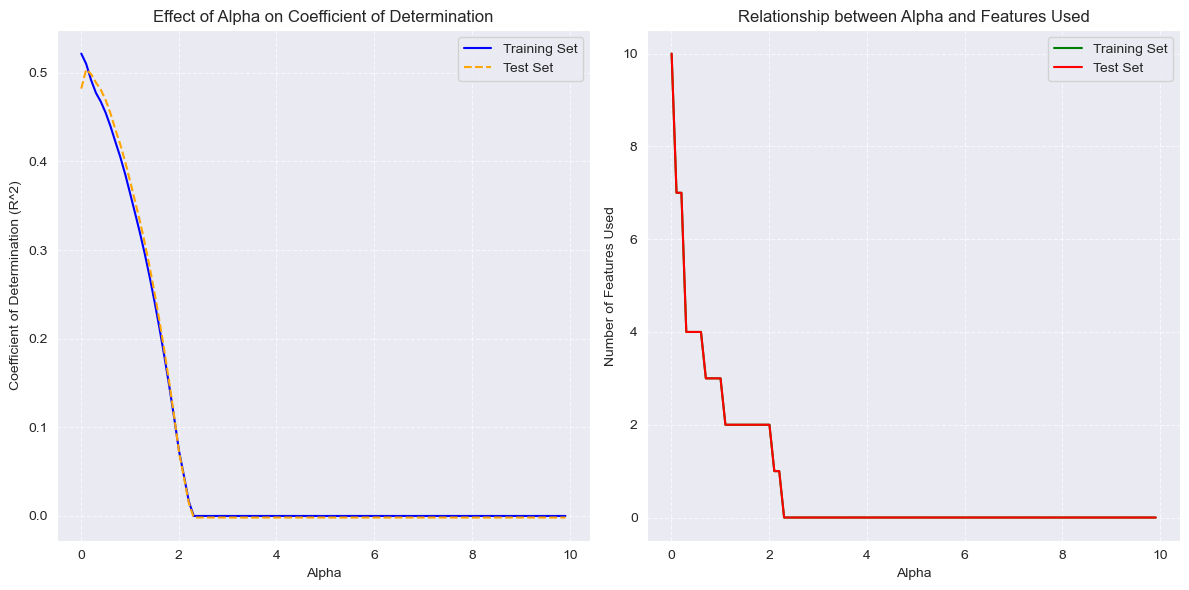

In [67]:
alpha_values = np.arange(0.01, 10.01, 0.1)
used_features_training = []
scores_training = []
used_features_testing = []
scores_testing = []

for alpha_value in alpha_values:
    model = Lasso(alpha=alpha_value, max_iter=10000)
    model.fit(X_training, y_training)

    used_features_training.append(np.sum(model.coef_ != 0))
    scores_training.append(model.score(X_training, y_training))

    used_features_testing.append(np.sum(model.coef_ != 0))
    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, scores_training, label='Training Set', linestyle='-', color='blue')
plt.plot(alpha_values, scores_testing, label='Test Set', linestyle='--', color='orange')

plt.title('Effect of Alpha on Coefficient of Determination')
plt.xlabel('Alpha')
plt.ylabel('Coefficient of Determination (R^2)')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best')


plt.subplot(1, 2, 2)
plt.plot(alpha_values, used_features_training, label='Training Set', linestyle='-',  color='green')
plt.plot(alpha_values, used_features_testing, label='Test Set', linestyle='-', color='red')

plt.title('Relationship between Alpha and Features Used')
plt.xlabel('Alpha')
plt.ylabel('Number of Features Used')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best')

plt.tight_layout()
plt.show()


<p>
В данном случае анализ графика показал, что использование Lasso регрессии не привело к существенным изменениям в отборе признаков. Результаты, полученные с помощью Lasso регрессии, оказались схожими с результатами Ridge регрессии. К сожалению, в таких случаях может потребоваться более продвинутый подход к анализу данных, например, использование методов машинного обучения с нелинейными моделями.
</p>

### 2. Exercise Dataset

In [26]:
linnerud_dataset = load_linnerud()

### Description

In [28]:
print(linnerud_dataset['DESCR'])

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



### Dataset dimension

In [68]:
print(linnerud_dataset['data'].shape)

(20, 3)


### Features

In [69]:
print(linnerud_dataset['feature_names'])

['Chins', 'Situps', 'Jumps']


### Exercise data (push-ups, squats, jumping)

In [70]:
print(linnerud_dataset['data'])

[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]
 [  4. 101.  42.]
 [  8. 101.  38.]
 [  6. 125.  40.]
 [ 15. 200.  40.]
 [ 17. 251. 250.]
 [ 17. 120.  38.]
 [ 13. 210. 115.]
 [ 14. 215. 105.]
 [  1.  50.  50.]
 [  6.  70.  31.]
 [ 12. 210. 120.]
 [  4.  60.  25.]
 [ 11. 230.  80.]
 [ 15. 225.  73.]
 [  2. 110.  43.]]


### Physiological data (weight, waist, pulse)

In [71]:
print(linnerud_dataset['target'])

[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]
 [182.  36.  56.]
 [211.  38.  56.]
 [167.  34.  60.]
 [176.  31.  74.]
 [154.  33.  56.]
 [169.  34.  50.]
 [166.  33.  52.]
 [154.  34.  64.]
 [247.  46.  50.]
 [193.  36.  46.]
 [202.  37.  62.]
 [176.  37.  54.]
 [157.  32.  52.]
 [156.  33.  54.]
 [138.  33.  68.]]


### Distribution of dataset features - Exercises

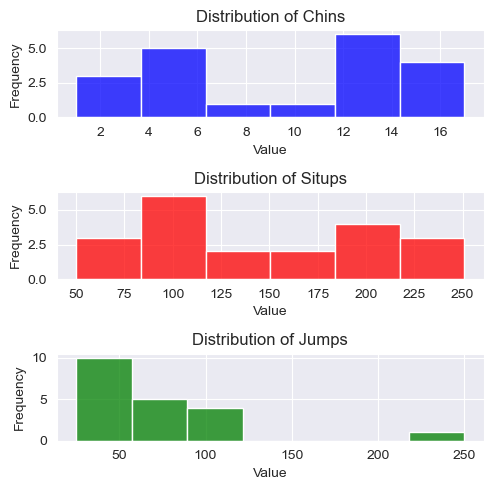

In [75]:
linnerud_df = pd.DataFrame(linnerud_dataset['data'], columns=linnerud_dataset['feature_names'])

colors = ['blue', 'red', 'green']

plt.figure(figsize=(5, 5))

for i, feature in enumerate(linnerud_dataset['feature_names']):
    plt.subplot(3, 1, i + 1)
    sns.histplot(linnerud_df[feature], color=colors[i])
    plt.title(f'Distribution of {feature}')
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Distribution of dataset features - physiological data

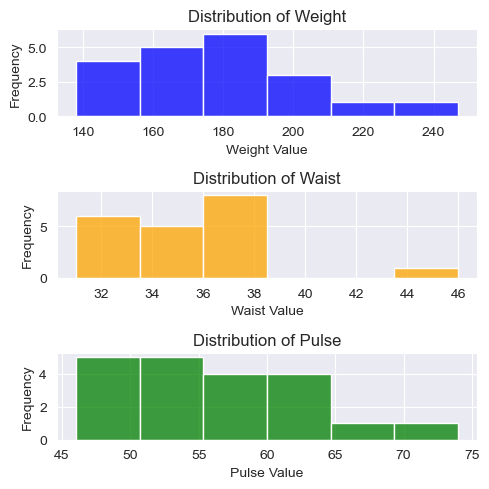

In [78]:
linnerud_df = pd.DataFrame(linnerud_dataset['target'], columns=['Weight', 'Waist', 'Pulse'])

colors = ['blue', 'orange', 'green']

plt.figure(figsize=(5, 5))

for i, feature in zip([0, 1, 2], ['Weight', 'Waist', 'Pulse']):
    plt.subplot(3, 1, i + 1)
    sns.histplot(linnerud_df[feature], color=colors[i])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature} Value')
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Splitting the dataset into training and test sets

In [89]:
X_training, X_testing, y_training, y_testing = train_test_split(linnerud_dataset['data'], linnerud_dataset['target'], random_state=10)

<h4>k-nearest neighbors regression algorithm

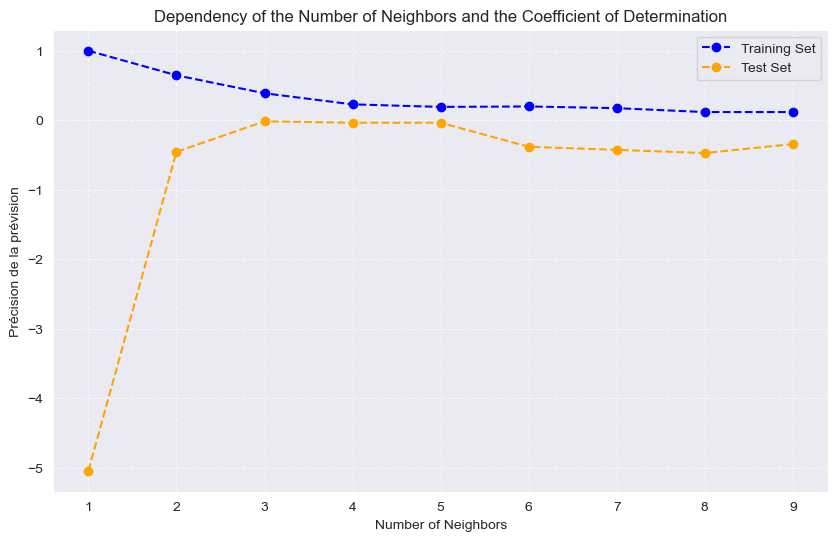

In [90]:
n_neighbors_values = [i for i in range(1, 10)]
scores_training = []
scores_testing = []

for n_value in n_neighbors_values:
    model = KNeighborsRegressor(n_neighbors=n_value)
    model.fit(X_training, y_training)
    scores_training.append(model.score(X_training, y_training))

for n_value in n_neighbors_values:
    model = KNeighborsRegressor(n_neighbors=n_value)
    model.fit(X_training, y_training)
    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(10, 6))

plt.plot(n_neighbors_values, scores_training, label='Training Set', marker='o', linestyle='--', color='blue')
plt.plot(n_neighbors_values, scores_testing, label='Test Set', marker='o', linestyle='--', color='orange')

plt.title('Dependency of the Number of Neighbors and the Coefficient of Determination')
plt.xlabel('Number of Neighbors')
plt.ylabel('Précision de la prévision')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best')

plt.show()


<p>
Из графика зависимости коэффициента детерминации мы видим, что при увеличении числа соседей производительность на обучающем наборе данных снижается, что может свидетельствовать о переобучении модели. Однако на тестовом наборе данных производительность сначала увеличивается и затем стабилизируется.С увеличением числа соседей смещение увеличивается, но разброс снижается, что приводит к более стабильной производительности на тестовом наборе. В данном случае, оптимальное количество соседей будет максимален при 3-5 соседях на тестовом наборе.
</p>

### Linear Regression

In [97]:
model = LinearRegression()
model.fit(X_training, y_training)

print('Weights (coef_):\n', model.coef_)
print('\nShift (intercept_): ', model.intercept_)

print('\nCoefficient of determination for the training set: ', model.score(X_training, y_training))
print('\nDetermination coefficient for test set: ', model.score(X_testing, y_testing))

Weights (coef_):
 [[ 0.49402866 -0.27433127  0.05463569]
 [-0.1195927  -0.04166153  0.02544186]
 [ 0.17618927  0.03553087 -0.02876975]]

Shift (intercept_):  [212.78877148  41.03010837  50.93359823]

Coefficient of determination for the training set:  0.3275910119415463

Determination coefficient for test set:  -0.20688832693072398


<p>
Исходя из этих результатов, модель линейной регрессии, возможно, не является наилучшим выбором для данного набора. Она может не улавливать сложные нелинейные взаимосвязи или требовать дополнительной настройки. Так как значение R^2 для тестового набора отрицательное (-0.2069) - это может указывать на то, что модель плохо обобщает данные. Можно рассмотреть альтернативные методы моделирования или дополнительную предобработку данных для улучшения качества прогнозирования.
</p>

### Ridge regression

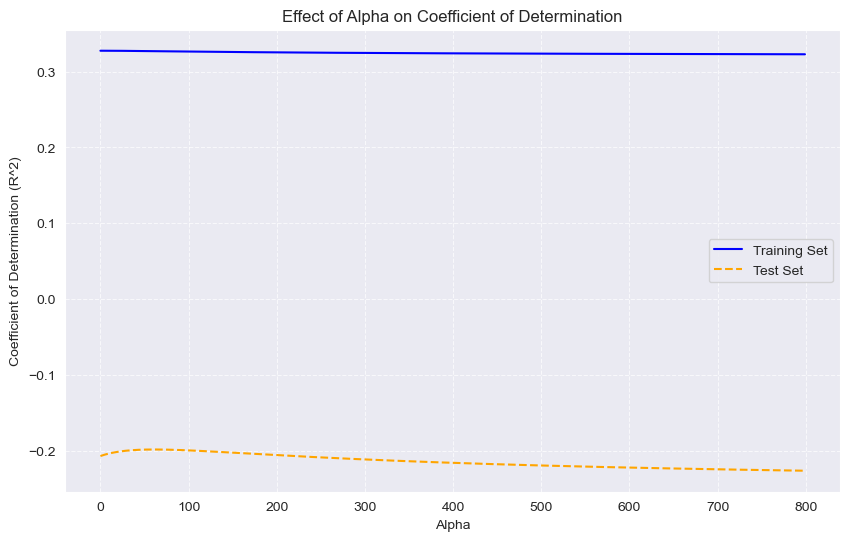

In [105]:
alpha_values = np.arange(0, 800, 1)
scores_training = []
scores_testing = []

for alpha_value in alpha_values:
    model = Ridge(alpha=alpha_value)
    model.fit(X_training, y_training)
    score_training = model.score(X_training, y_training)
    score_testing = model.score(X_testing, y_testing)
    scores_training.append(score_training)
    scores_testing.append(score_testing)

plt.figure(figsize=(10, 6))

plt.plot(alpha_values, scores_training, label='Training Set', linestyle='-', color='blue')
plt.plot(alpha_values, scores_testing, label='Test Set', linestyle='--', color='orange')

plt.title('Effect of Alpha on Coefficient of Determination')
plt.xlabel('Alpha')
plt.ylabel('Coefficient of Determination (R^2)')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best')

plt.show()


<p>
Эта модель продемонстрировала не очень приятную точность. Выводы из графика таковы: модель слишком сложна и может иметь тенденцию к переобучению.
</p>

### Lasso regression

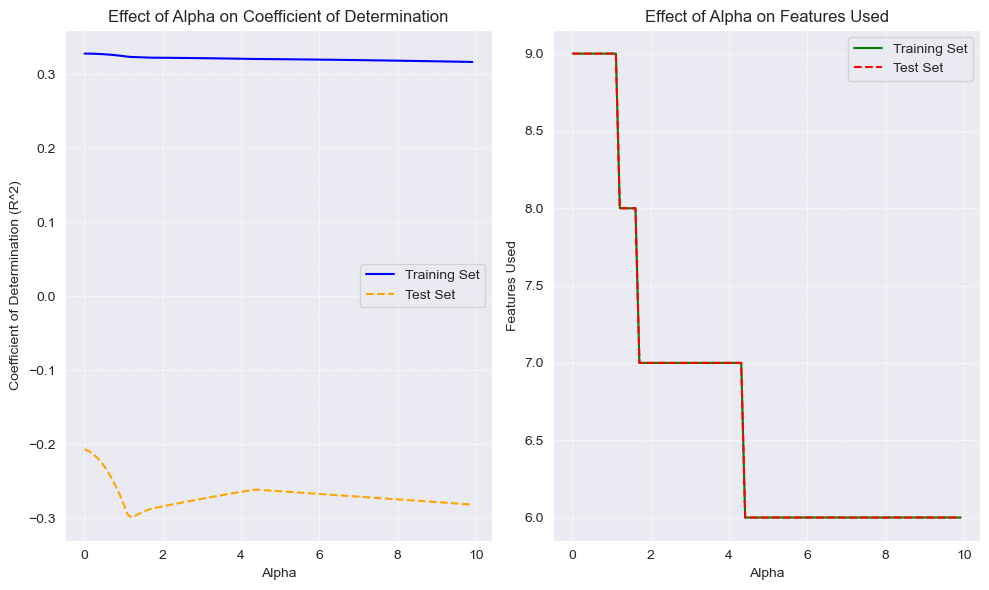

In [108]:
alpha_values = np.arange(0.01, 10.01, 0.1)
used_features_training = []
scores_training = []

alphi_values = np.arange(0.01, 10.01, 0.1)
used_features_testing = []
scores_testing = []

for alpha_value in alpha_values:
    model = Lasso(alpha=alpha_value, max_iter=10000)
    model.fit(X_training, y_training)

    used_features_training.append(np.sum(model.coef_ != 0))
    scores_training.append(model.score(X_training, y_training))

    model = Lasso(alpha=alpha_value, max_iter=10000)
    model.fit(X_training, y_training)

    used_features_testing.append(np.sum(model.coef_ != 0))
    scores_testing.append(model.score(X_testing, y_testing))

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(alpha_values, scores_training, label='Training Set', linestyle='-', color='blue')
plt.plot(alphi_values, scores_testing, label='Test Set', linestyle='--', color='orange')

plt.title('Effect of Alpha on Coefficient of Determination')
plt.xlabel('Alpha')
plt.ylabel('Coefficient of Determination (R^2)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(alpha_values, used_features_training, label='Training Set', linestyle='-', color='green')
plt.plot(alpha_values, used_features_testing, label='Test Set', linestyle='--', color='red')

plt.title('Effect of Alpha on Features Used')
plt.xlabel('Alpha')
plt.ylabel('Features Used')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='best')

plt.tight_layout()
plt.show()

<p>
    Итак, Lasso регрессия показала что коэффициент детерминации на обучающем наборе данных уменьшается по мере увеличения значения alpha, что свидетельствует о том, что более высокие значения alpha приводят к сокращению способности модели к объяснению вариации в данных. Но на тестовом наборе данных видим уменьшение коэффициента детерминации с увеличением alpha. Это указывает на то, что увеличение alpha помогает предотвратить переобучение и улучшить способность модели к обобщению.
</p>